In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('cardekho_dataset.csv')
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
df.columns


Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df['seats'].dtype !='O'

True

In [ ]:
num_features=[feature for feature in df.columns if df[feature].dtype !='O']
categ_features=[feature for feature in df.columns if df[feature].dtype =='O']

In [ ]:
print(num_features)
print(categ_features)


['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [ ]:
for val in categ_features:
  print(df[val].value_counts(normalize=True)*100)
  print('---------------')

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
---------------
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini              0.110311
Nissa

UNIVARIATE ANALYSIS OF NUMERICAL FEATURES

<ipython-input-12-0228632875fd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[num_features[i]],kde=True)
<ipython-input-12-0228632875fd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[num_features[i]],kde=True)
<ipython-input-12-0228632875fd>:5: UserWarning: 

`distplot` is a depr

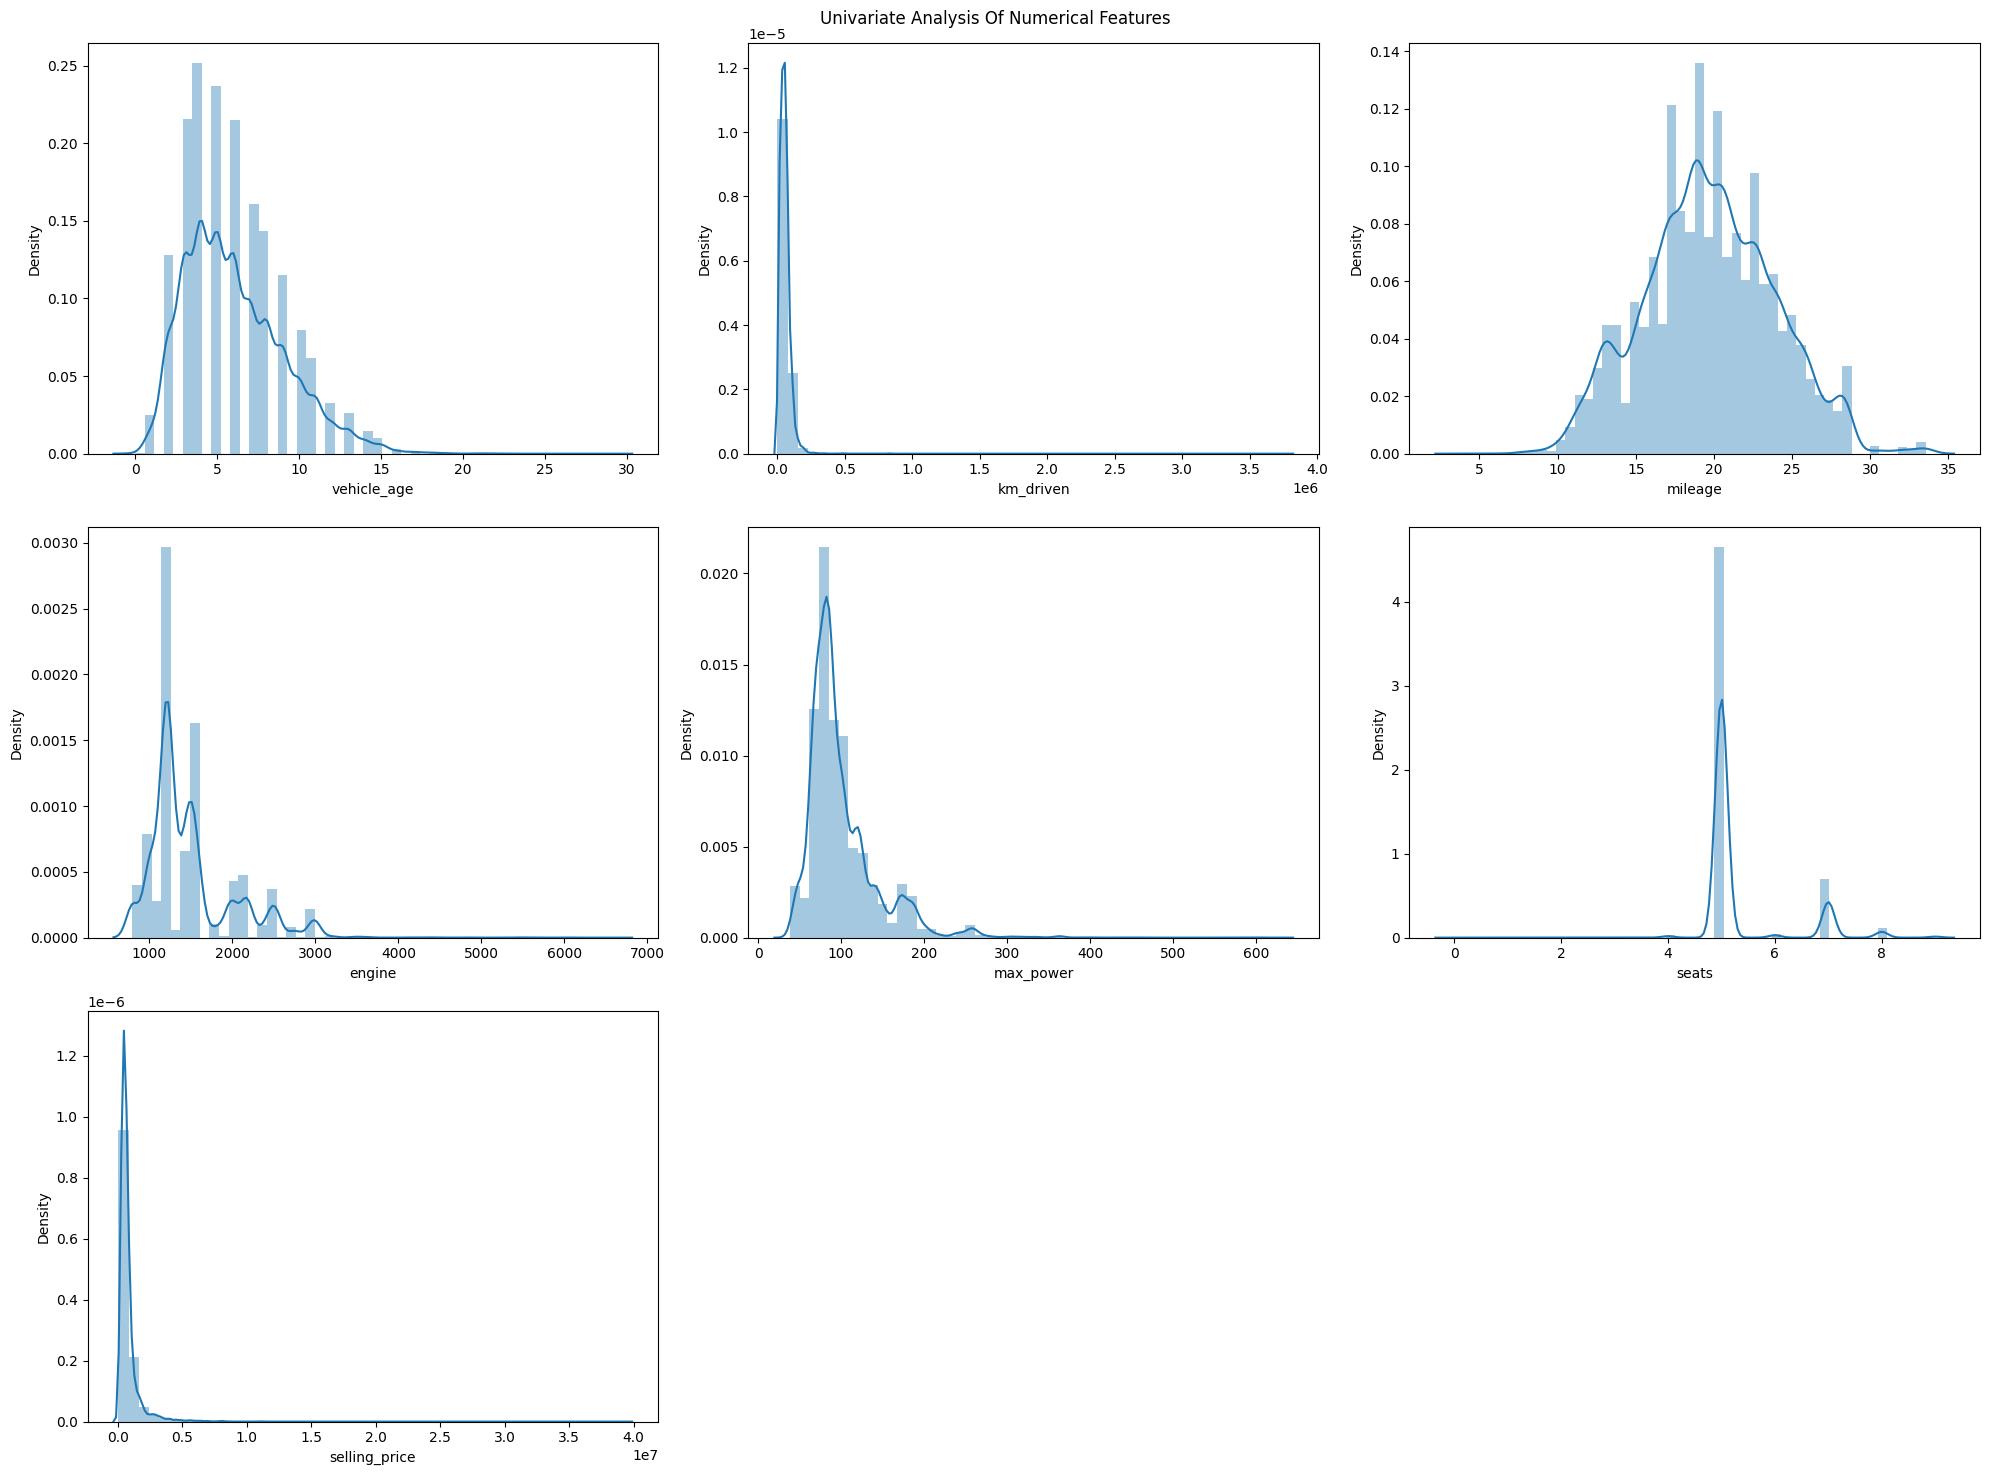

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis Of Numerical Features')
for i in range(0,len(num_features)):
  plt.subplot(3,3,i+1)
  sns.distplot(x=df[num_features[i]],kde=True)
  plt.xlabel(num_features[i])
  plt.tight_layout()

UNIVARIATE ANALYSIS OF CATEGORICAL FEATURES

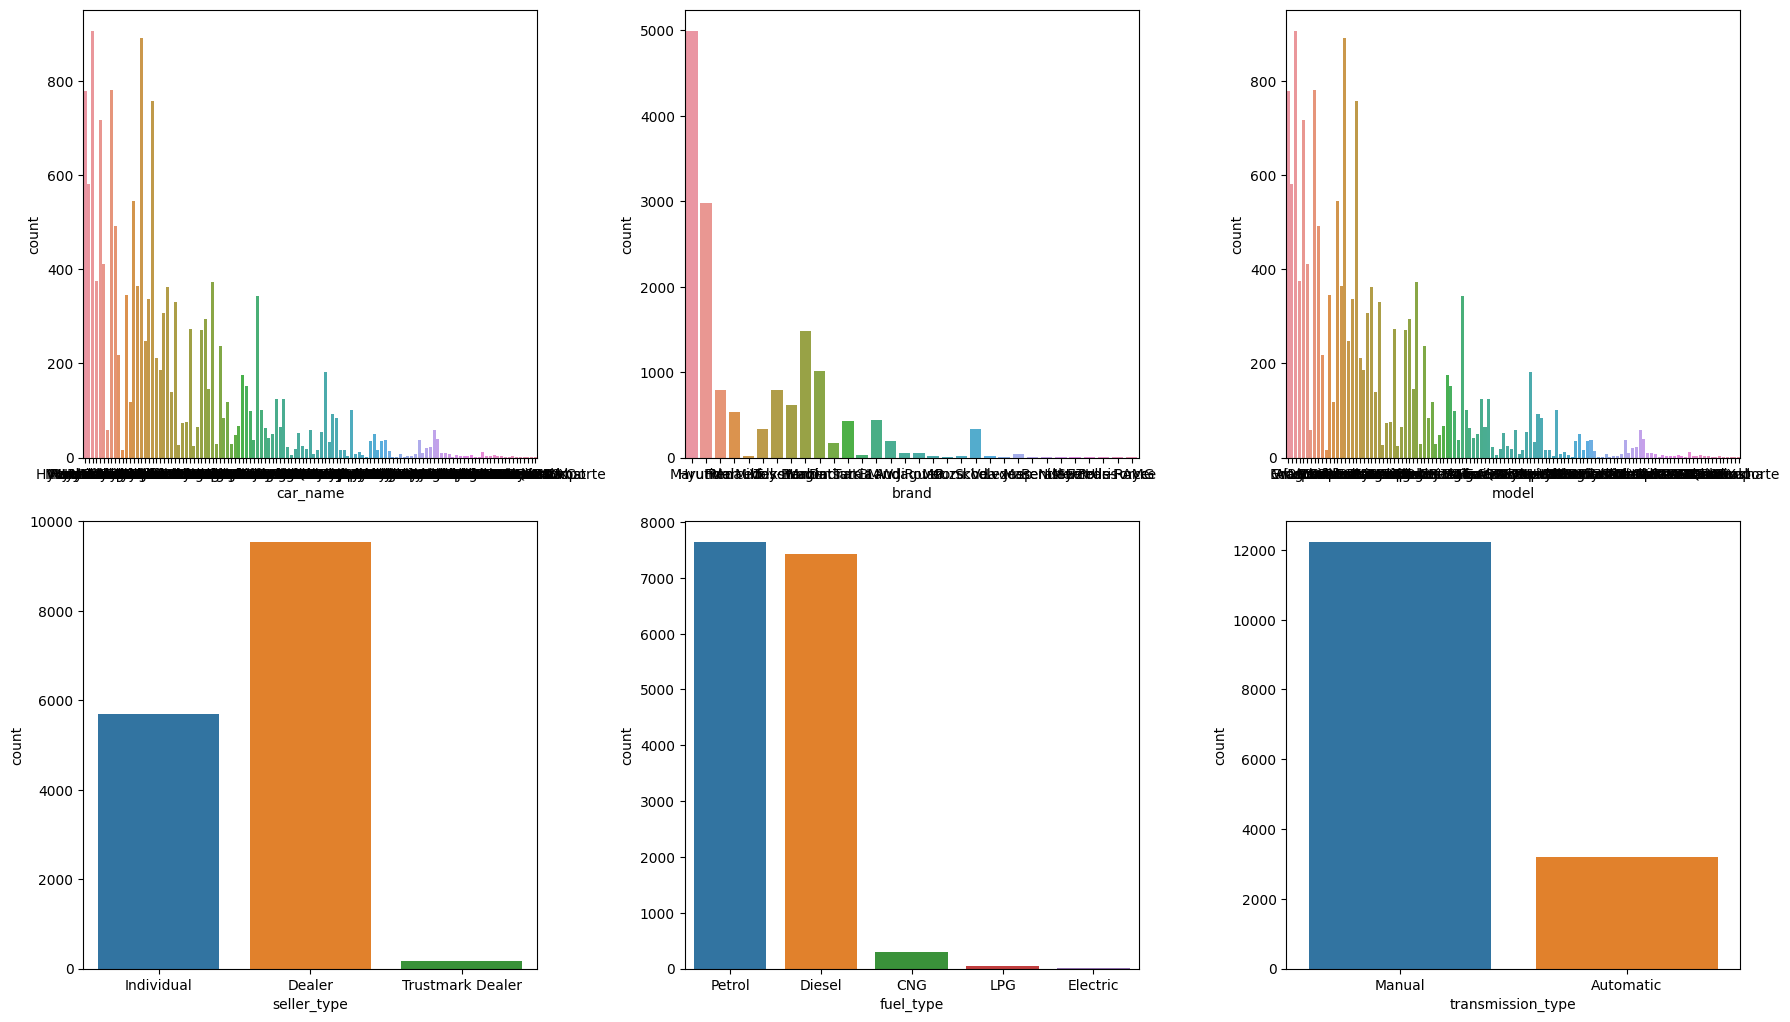

In [ ]:
plt.figure(figsize=(18,15))
for i in range(0,len(categ_features)):
  plt.subplot(3,3,i+1)
  sns.countplot(x=df[categ_features[i]],data=df)
  plt.tight_layout()

<ipython-input-14-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

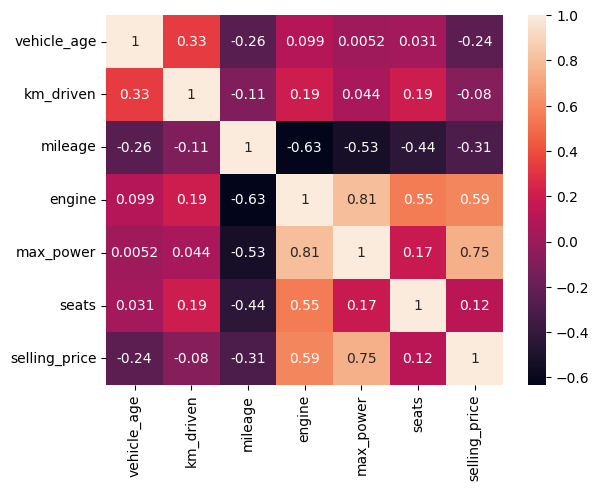

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop('car_name',axis=1,inplace=True)

In [ ]:
df['transmission_type']=pd.get_dummies(df['transmission_type'],drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


In [ ]:
df['fuel_type']=labelencoder.fit_transform(df['fuel_type'])

In [ ]:
df['seller_type'] =labelencoder.fit_transform(df['seller_type'])

In [ ]:
df['model']=labelencoder.fit_transform(df['model'])

In [ ]:
df['brand']=labelencoder.fit_transform(df['brand'])

In [ ]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [ ]:
df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,18,7,9,0.031553,1,4,1,19.70,796,46.30,5,120000
1,8,54,5,0.005237,1,4,1,18.90,1197,82.00,5,550000
2,8,118,11,0.015764,1,4,1,17.00,1197,80.00,5,215000
3,18,7,9,0.009711,1,4,1,20.92,998,67.10,5,226000
4,6,38,6,0.007869,0,1,1,22.77,1498,98.59,5,570000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['km_driven']]=scaler.fit_transform(df[['km_driven']])

In [ ]:
df[['engine']]=scaler.fit_transform(df[['engine']])

In [ ]:
df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,18,7,9,0.031553,1,4,1,19.70,0.000517,46.30,5,120000
1,8,54,5,0.005237,1,4,1,18.90,0.069667,82.00,5,550000
2,8,118,11,0.015764,1,4,1,17.00,0.069667,80.00,5,215000
3,18,7,9,0.009711,1,4,1,20.92,0.035351,67.10,5,226000
4,6,38,6,0.007869,0,1,1,22.77,0.121573,98.59,5,570000


In [ ]:
y=df['selling_price']

In [ ]:
X=df
X.head()


,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,18,7,9,0.031553,1,4,1,19.70,0.000517,46.30,5,120000
1,8,54,5,0.005237,1,4,1,18.90,0.069667,82.00,5,550000
2,8,118,11,0.015764,1,4,1,17.00,0.069667,80.00,5,215000
3,18,7,9,0.009711,1,4,1,20.92,0.035351,67.10,5,226000
4,6,38,6,0.007869,0,1,1,22.77,0.121573,98.59,5,570000


In [ ]:
X.drop('selling_price',axis=1,inplace=True)

In [ ]:
X.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,18,7,9,0.031553,1,4,1,19.70,0.000517,46.30,5
1,8,54,5,0.005237,1,4,1,18.90,0.069667,82.00,5
2,8,118,11,0.015764,1,4,1,17.00,0.069667,80.00,5
3,18,7,9,0.009711,1,4,1,20.92,0.035351,67.10,5
4,6,38,6,0.007869,0,1,1,22.77,0.121573,98.59,5


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)